In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sc
from  mpmath import mp

### Задание 1

Проверить на однородность с помощью критерия хи-квадрат наборы цифр числа π и e.

In [23]:
for k in [400, 700, 1000]:
    mp.dps = k
    expnum = []
    pinum = []
    i=1
    exp = mp.e
    pi = mp.pi
    for i in range(k):
        exp = exp * 10 - np.floor(exp) * 10
        pi = pi * 10 - np.floor(pi) * 10
        expnum.append(np.floor(exp % 10))
        pinum.append(np.floor(pi % 10))
    expfreq = np.unique(np.sort(expnum), return_counts = True)[1]     
    pifreq = np.unique(np.sort(pinum), return_counts = True)[1] 
    chisquare = sc.chisquare(expfreq, pifreq)[0]
    pvchisquare = sc.chisquare(expfreq, pifreq)[1]
    n = 0
    for i in range(10000000):
        s = np.random.permutation(np.concatenate((expnum, pinum), axis = 0))
        expfreq = np.unique(s[:k], return_counts = True)[1]     
        pifreq = np.unique(s[k:], return_counts = True)[1]      
        if sc.chisquare(expfreq, pifreq)[0] > chisquare:
            n += 1 
    print(' k = ' + str(k) + ' хи квадрат p-value ' + str(pvchisquare) + '  перестановочный p-value  ' + str((n + 1)/ 10000001))
    

 k = 400 хи квадрат p-value 6.698156645910636e-06  перестановочный p-value  0.02700009729999027
 k = 700 хи квадрат p-value 0.6094893115597426  перестановочный p-value  0.9354434064556594
 k = 1000 хи квадрат p-value 0.571063324455739  перестановочный p-value  0.9240220075977993


### Задание 2

пара зависимых нормальных величин

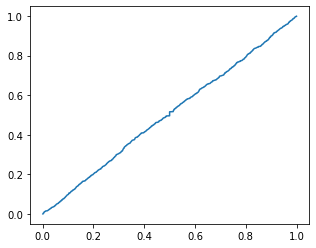

In [2]:
N = 1000
p = []
for n in range(1, N+1):
    x = sc.norm.rvs(3, size = n)
    y = x + sc.norm.rvs(scale = 1.6, size =n)
    u = np.array([int(x[i] - y[i] > 0) for i in range(n)])
    if n <= 15:
        s = np.sum(u)
        p.append(1 - sc.binom.cdf(s,n,1/2))
    else:
        s = (np.sum(u) - n / 2) / np.sqrt(n / 4)
        p.append(1 - sc.norm.cdf(s))
p = np.sort(p)
v = np.arange(0,1, 1/N)
plt.figure(figsize = (5,4))
plt.plot(p, v)
plt.show()

In [ ]:
plt.figure(figsize = (5,4))
plt.plot(p, v)
plt.show()

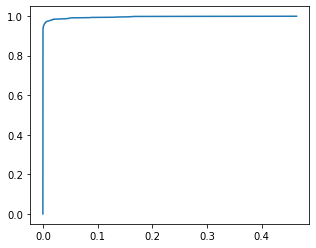

In [36]:
N = 1000
p = []
for n in range(15, N+15):
    x = sc.norm.rvs(3, size = n)
    y = x + sc.norm.rvs(scale = 1, size =n)
    u = np.sort(np.abs(np.array([int(x[i] - y[i] > 0) for i in range(n)])))
    t = np.sum([ i*u[i] for i in range(len(u))])
    p.append(1 - sc.norm.cdf((t - n*(n+1)/4)/np.sqrt(n*(n+1)*(2*n+1)/24)))
p = np.sort(p)
v = np.arange(0, 1, 1/N)
plt.figure(figsize = (5,4))
plt.plot(p, v)
plt.show()

Коши

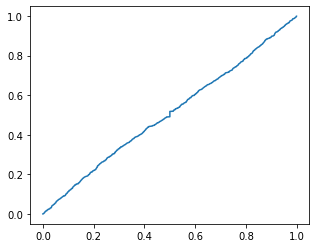

In [37]:
N = 1000
p = []
for n in range(1, N+1):
    u = sc.bernoulli.rvs(p = 1/2, size = n)
    if n <= 15:
        s = np.sum(u)
        p.append(1 - sc.binom.cdf(s,n,1/2))
    else:
        s = (np.sum(u) - n / 2) / np.sqrt(n / 4)
        p.append(1 - sc.norm.cdf(s))
p = np.sort(p)
v = np.arange(0,1, 1/N)
plt.figure(figsize = (5,4))
plt.plot(p, v)
plt.show()

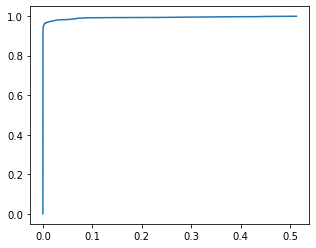

In [40]:
N = 1000
p = []
for n in range(15, N+15):
    x = sc.cauchy.rvs(size = n)
    y = x + sc.norm.rvs(scale = 1, size =n)
    u = np.sort(np.abs(sc.bernoulli.rvs(p = 1/2, size = n)))
    t = np.sum([ i*u[i] for i in range(len(u))])
    p.append(1 - sc.norm.cdf((t - n*(n+1)/4)/np.sqrt(n*(n+1)*(2*n+1)/24)))
p = np.sort(p)
v = np.arange(0, 1, 1/N)
plt.figure(figsize = (5,4))
plt.plot(p, v)
plt.show()

### Задание 3

In [12]:
def S(x, y):
    if x > y:
        return 1
    elif x == y:
        return 0.5
    else:
        return 0

    
def MW_statistics(X, Y):
    res = 0
    for x in X:
        for y in Y:
            res += S(x, y)
    return res


def MW_perm_test(X, Y, N):
    merged_data = np.concatenate((X, Y))
    critical_value = MW_statistics(X, Y)
    
    counter = 0
    for i in range(N):
        perm_data = np.random.permutation(merged_data)
        if MW_statistics(perm_data[:len(X)], perm_data[len(X):]) > critical_value:
            counter += 1
            
    return (counter) / (N)

def KS_perm_test(X, Y, N):
    merged_data = np.concatenate((X, Y))
    critical_value = sc.ks_2samp(X, Y)[0]
    
    counter = 0
    for i in range(N):
        perm_data = np.random.permutation(merged_data)
        if sc.ks_2samp(perm_data[:len(X)], perm_data[len(X):])[0] > critical_value:
            counter += 1
            
    return (counter) / N

In [13]:
repets = 100
n = 50
x = np.arange(0, 1, 1/repets)

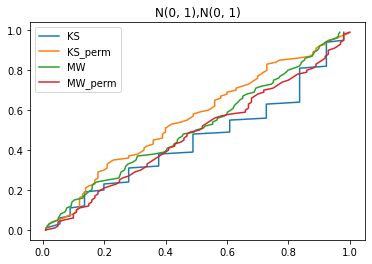

In [16]:
p_value_KS = []
p_value_per_KS = []
p_value_MW = []
p_value_per_MW = []
for i in range(repets):
    X = sc.norm.rvs(size = n)
    Y = sc.norm.rvs(size = n)
    p_value_KS.append(sc.ks_2samp(X, Y, alternative = "greater")[1])
    p_value_per_KS.append(KS_perm_test(X, Y, 100))
    p_value_MW.append(sc.mannwhitneyu(X, Y, alternative = "less")[1])
    p_value_per_MW.append(MW_perm_test(X, Y, 100))
    
p_value_KS.sort()
p_value_per_KS.sort()
p_value_MW.sort()
p_value_per_MW.sort()

plt.plot(p_value_KS, x, p_value_per_KS, x, p_value_MW, x, p_value_per_MW, x)
plt.legend(["KS", "KS_perm", "MW", "MW_perm"])
plt.title("N(0, 1),N(0, 1)")
plt.show()

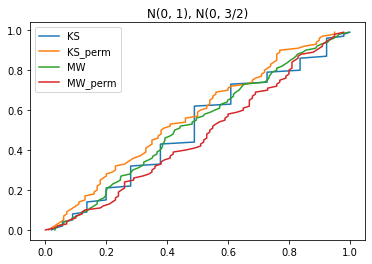

In [18]:
p_value_KS = []
p_value_per_KS = []
p_value_MW = []
p_value_per_MW = []
for i in range(repets):
    X = sc.norm.rvs(size = n)
    Y = sc.norm.rvs(scale = (1.5)**0.5, size = n)
    p_value_KS.append(sc.ks_2samp(X, Y, alternative = "greater")[1])
    p_value_per_KS.append(KS_perm_test(X, Y, 100))
    p_value_MW.append(sc.mannwhitneyu(X, Y, alternative = "less")[1])
    p_value_per_MW.append(MW_perm_test(X, Y, 100))
    
p_value_KS.sort()
p_value_per_KS.sort()
p_value_MW.sort()
p_value_per_MW.sort()

plt.plot(p_value_KS, x, p_value_per_KS, x, p_value_MW, x, p_value_per_MW, x)
plt.legend(["KS", "KS_perm", "MW", "MW_perm"])
plt.title("N(0, 1), N(0, 3/2)")
plt.show()

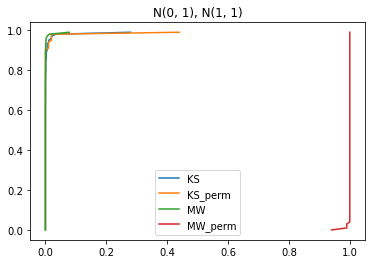

In [20]:
p_value_KS = []
p_value_per_KS = []
p_value_MW = []
p_value_per_MW = []
for i in range(repets):
    X = sc.norm.rvs(size = n)
    Y = sc.norm.rvs(loc = 1, size = n)
    p_value_KS.append(sc.ks_2samp(X, Y, alternative = "greater")[1])
    p_value_per_KS.append(KS_perm_test(X, Y, 100))
    p_value_MW.append(sc.mannwhitneyu(X, Y, alternative = "less")[1])
    p_value_per_MW.append(MW_perm_test(X, Y, 100))
    
p_value_KS.sort()
p_value_per_KS.sort()
p_value_MW.sort()
p_value_per_MW.sort()

plt.plot(p_value_KS, x, p_value_per_KS, x, p_value_MW, x, p_value_per_MW, x)
plt.legend(["KS", "KS_perm", "MW", "MW_perm"])
plt.title("N(0, 1), N(1, 1)")
plt.show()

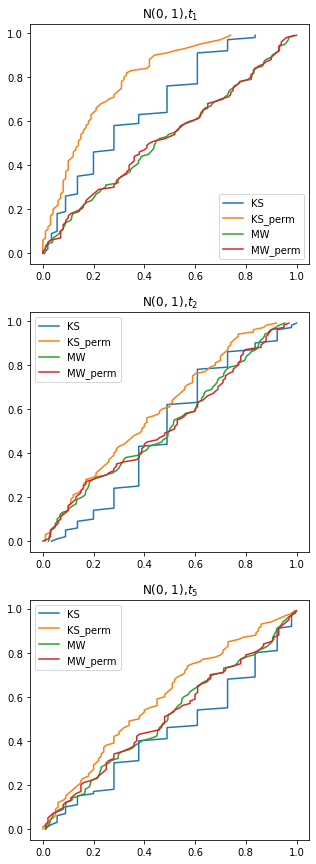

In [21]:
k = [1, 2, 5]
plt.figure(figsize=(5, 15))
for j in range(len(k)):
    plt.subplot(len(k), 1, j+1)
    p_value_KS = []
    p_value_per_KS = []
    p_value_MW = []
    p_value_per_MW = []
    for i in range(repets):
        X = sc.norm.rvs(size = n)
        Y = sc.t.rvs(df = k[j], size = n)
        p_value_KS.append(sc.ks_2samp(X, Y, alternative = "greater")[1])
        p_value_per_KS.append(KS_perm_test(X, Y, 100))
        p_value_MW.append(sc.mannwhitneyu(X, Y, alternative = "greater")[1])
        p_value_per_MW.append(MW_perm_test(X, Y, 100))

    p_value_KS.sort()
    p_value_per_KS.sort()
    p_value_MW.sort()
    p_value_per_MW.sort()

    plt.plot(p_value_KS, x, p_value_per_KS, x, p_value_MW, x, p_value_per_MW, x)
    plt.legend(["KS", "KS_perm", "MW", "MW_perm"])
    plt.title(f"N(0, 1),$t_{k[j]}$")
plt.show()

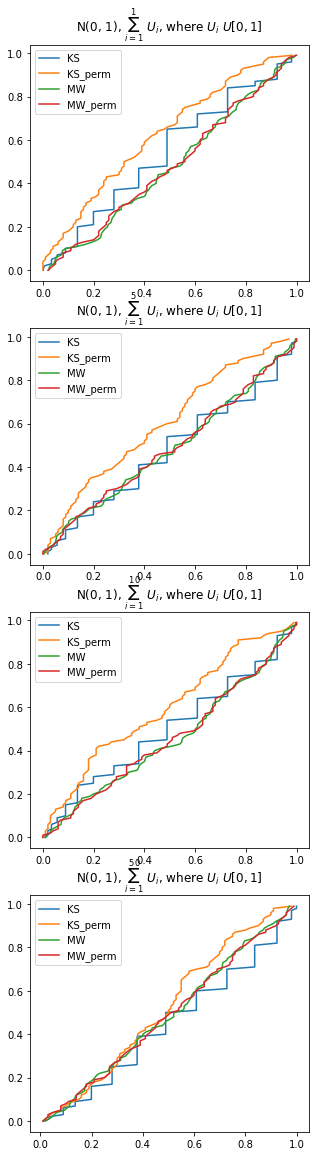

In [23]:
sum_len = [1, 5, 10, 50]

def gen(sum_len, size):
    res = []
    for i in range(size):
        res.append((sum(sc.uniform.rvs(size = sum_len)) - sum_len / 2) / (sum_len / 12)**0.5)
    
    return res

plt.figure(figsize=(5, 20))
for j in range(len(sum_len)):
    plt.subplot(len(sum_len), 1, j+1)
    p_value_KS = []
    p_value_per_KS = []
    p_value_MW = []
    p_value_per_MW = []
    for i in range(repets):
        X = sc.norm.rvs(size = n)
        Y = gen(sum_len[j], size = n)
        p_value_KS.append(sc.ks_2samp(X, Y, alternative = "greater")[1])
        p_value_per_KS.append(KS_perm_test(X, Y, 100))
        p_value_MW.append(sc.mannwhitneyu(X, Y, alternative = "greater")[1])
        p_value_per_MW.append(MW_perm_test(X, Y, 100))

    p_value_KS.sort()
    p_value_per_KS.sort()
    p_value_MW.sort()
    p_value_per_MW.sort()

    plt.plot(p_value_KS, x, p_value_per_KS, x, p_value_MW, x, p_value_per_MW, x)
    plt.legend(["KS", "KS_perm", "MW", "MW_perm"])
    plt.title("N(0, 1), $\sum_{i = 1}^{" + str(sum_len[j]) + "}$ $U_i$, where $U_i ~ U[0, 1]$")
plt.show()